# Homework 3: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/README.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (4 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [2]:
install.packages("gapminder")
library(gapminder)
library(tidyverse)

life_data <- gapminder
head(life_data)



The downloaded binary packages are in
	/var/folders/cr/5w4bx6nn5tbc9spb5wzmmk5w0000gn/T//Rtmp9ARe1e/downloaded_packages


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

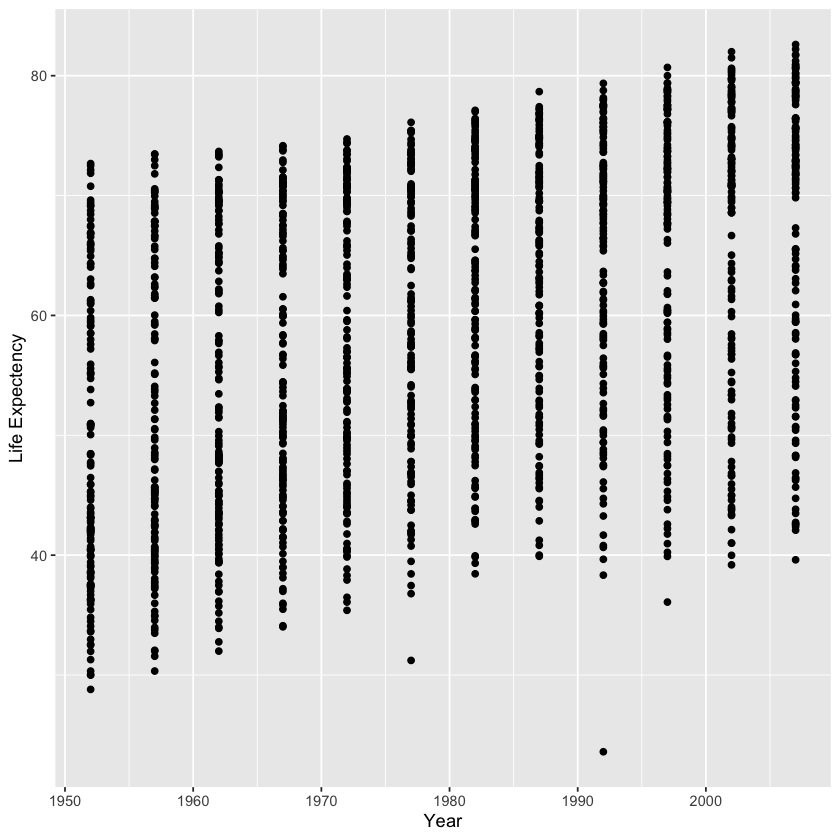

In [3]:
basic_plot <- ggplot(life_data, aes(x = year, y = lifeExp)) +
  geom_point() +
  labs(x = 'Year', 
       y = 'Life Expectency')
basic_plot


We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so. 

What trends can you identify in the data? 

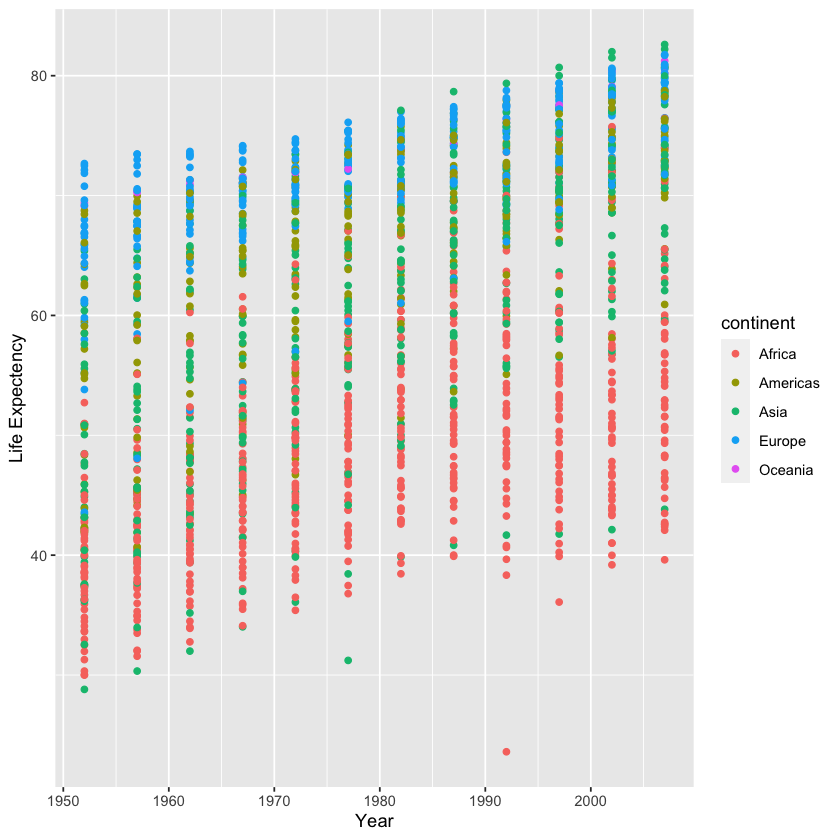

In [4]:
color_plot <- basic_plot <- ggplot(life_data, aes(x = year, y = lifeExp, color = continent)) +
  geom_point() +
  labs(x = 'Year', 
       y = 'Life Expectency')
color_plot


> While there is a broad distribution for each continent, the European countries typically have the highest life expentency, while the African countries generally have the lowest life expectancy. However, there are several outliers in about 1977, 1992, and 1997 where the life expectancy dipped, suggesting there were major crises in these regions during those years. As expected, there are no outliers far above the typical distribution (although it would be crazy if life expectancy suddenly shot up one year!)
> 

Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot. 

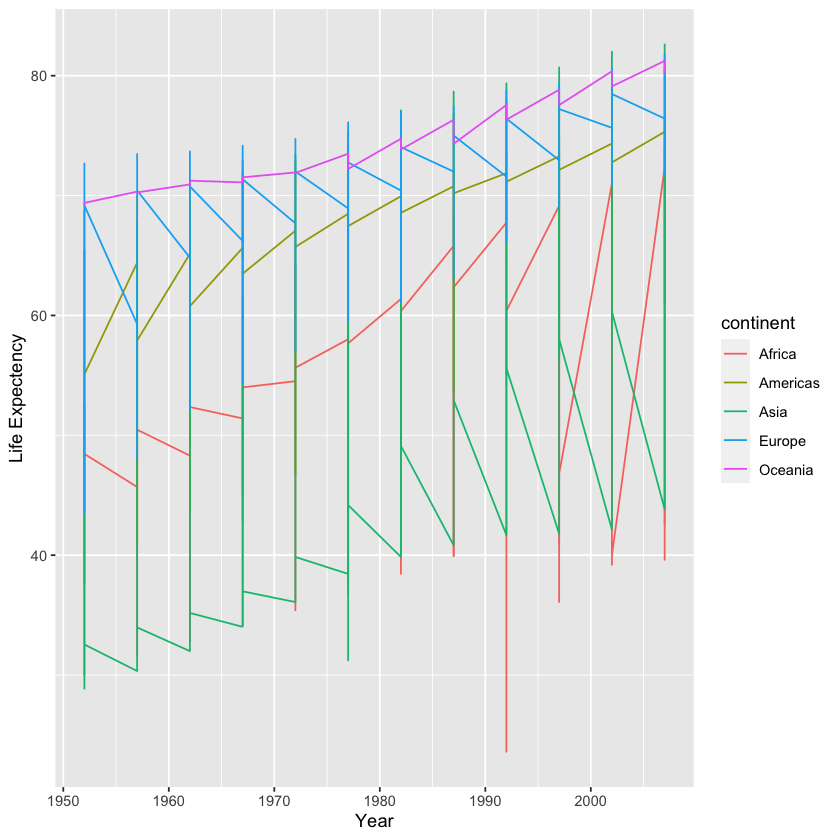

In [5]:
bad_line_plot <- basic_plot <- ggplot(life_data, aes(x = year, y = lifeExp, color = continent)) +
  geom_line() +
  labs(x = 'Year', 
       y = 'Life Expectency')
bad_line_plot

Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> The lines are trying to hit all the data points. Since there are multiple data points per year, the lines are spanning a large range of data for every year, rather than a single point. 
> 

Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

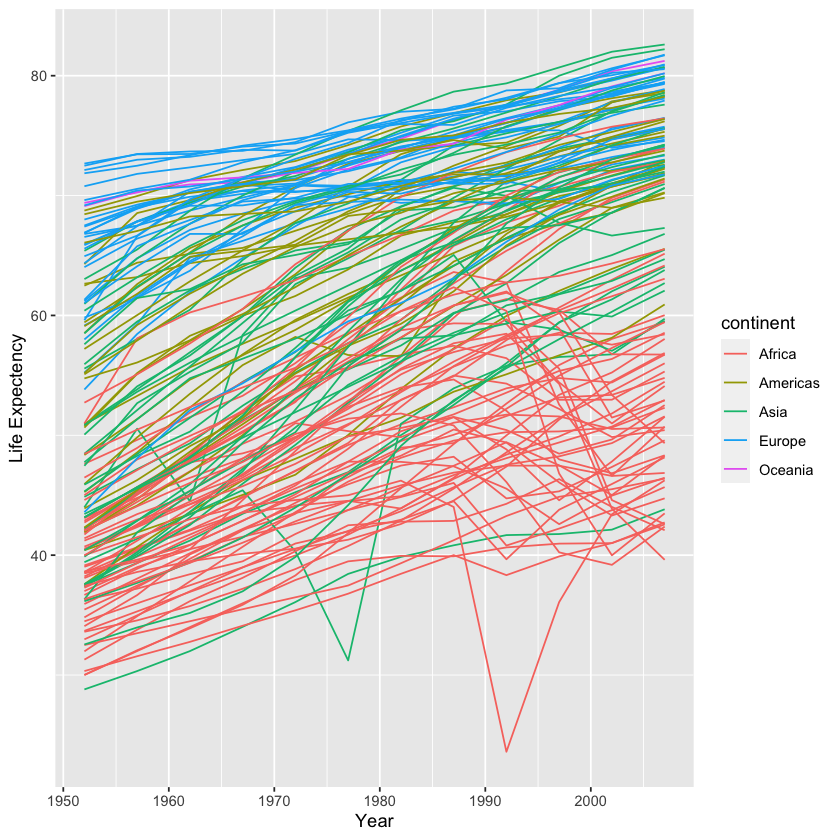

In [6]:
good_line_plot <- ggplot(life_data, aes(x = year, y = lifeExp, line = country, color = continent)) +
  geom_line() +
  labs(x = 'Year', 
       y = 'Life Expectency')
good_line_plot

But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer). 

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

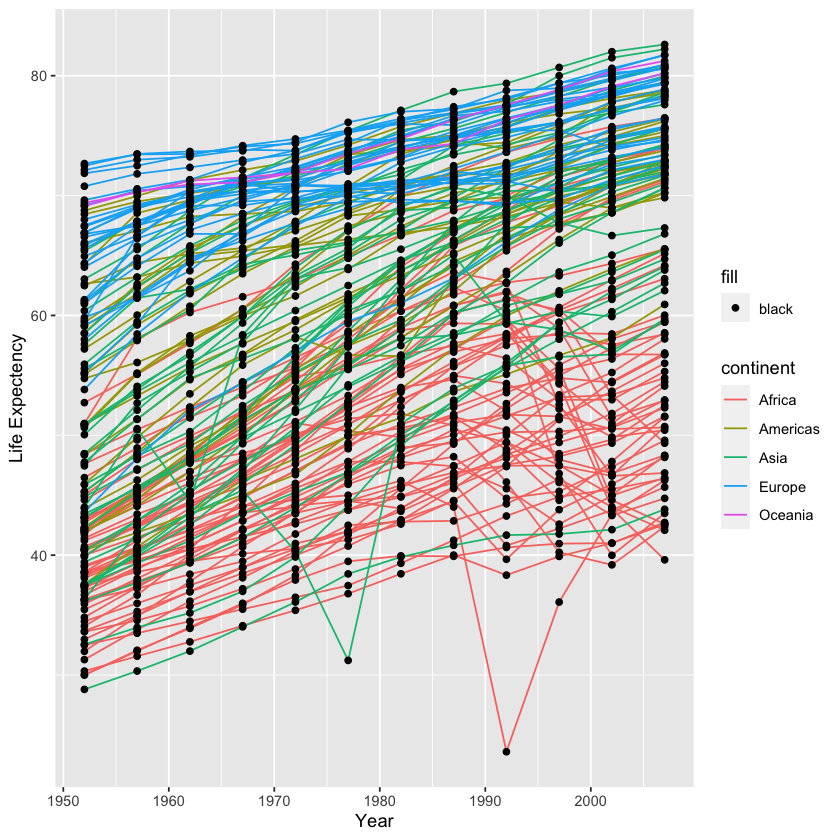

In [7]:
# method 1

points_over <- ggplot(life_data, aes(x = year, y = lifeExp, line = country)) +
  geom_line(aes(color = continent)) +
  geom_point(aes(fill = 'black')) +
  labs(x = 'Year', 
       y = 'Life Expectency')
points_over

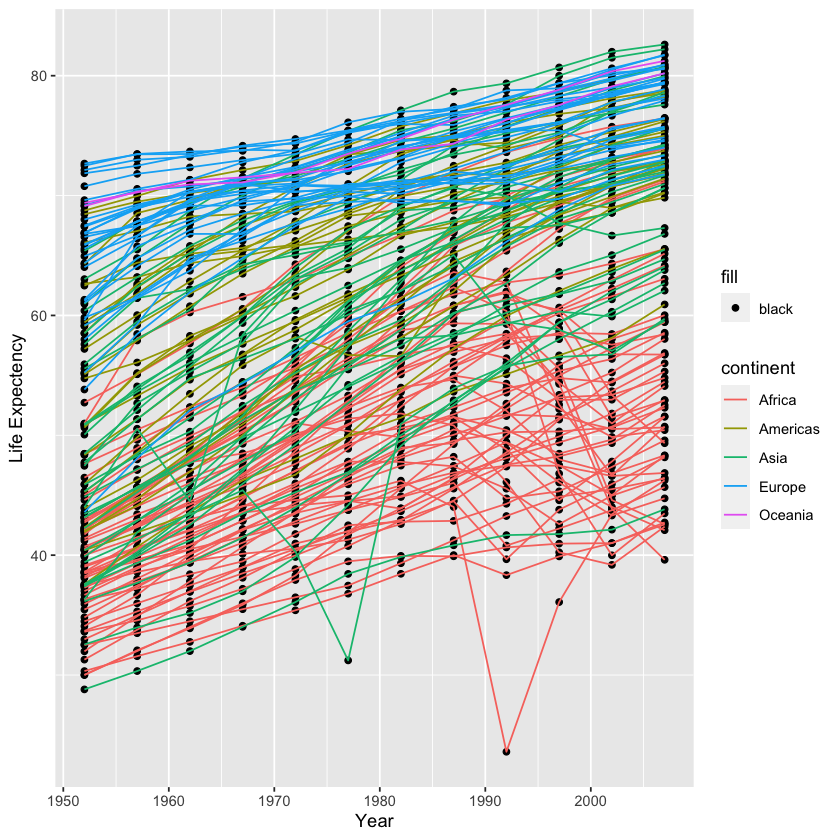

In [8]:
# method 2

points_under <- ggplot(life_data, aes(x = year, y = lifeExp, line = country)) +
  geom_point(aes(fill = 'black')) +
  geom_line(aes(color = continent)) +
  labs(x = 'Year', 
       y = 'Life Expectency')
points_under

---
# 2. Adding statistics (3 points)

`ggplot2` allows easy overlay of statistical models on top of the data. 

The graph below shows the relationship between life expectency and GDP per capita:

In [ ]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

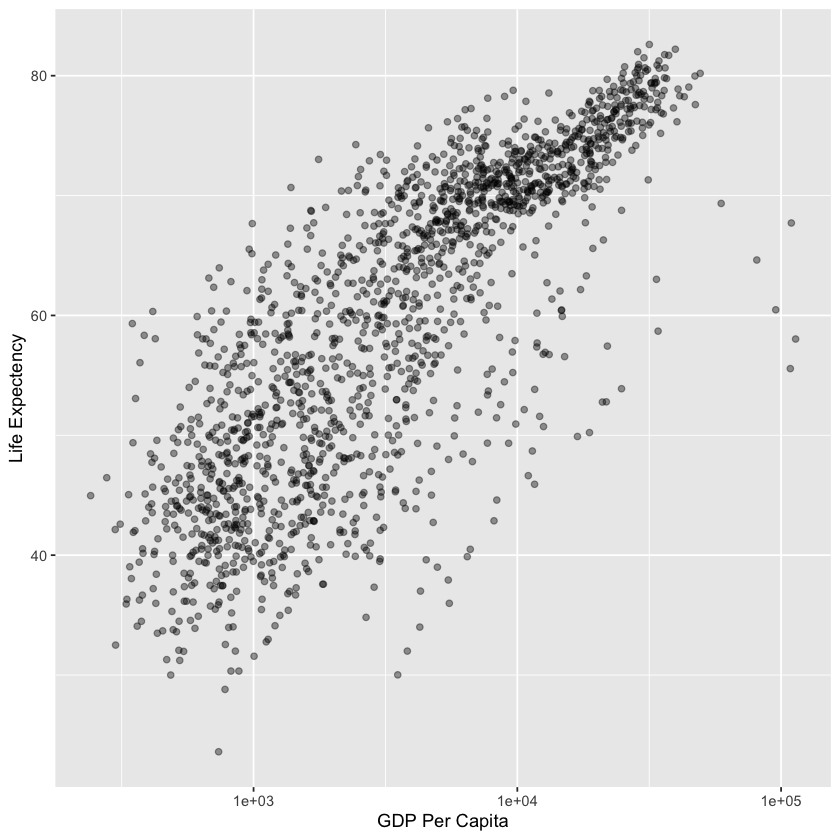

In [9]:
transparent_plot <- ggplot(data = life_data, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.4) +
  scale_x_log10() + # apply a log scale to see the trends more easily
  labs(x = 'GDP Per Capita', 
       y = 'Life Expectency')
transparent_plot

Already we can more easily visualize the trend in the data. 

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



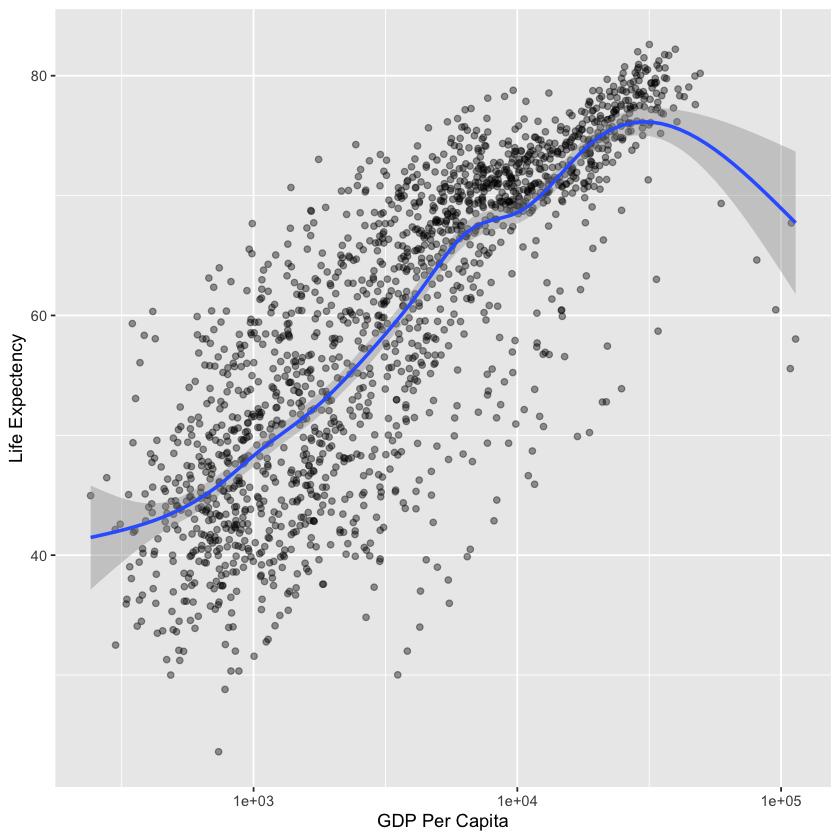

In [10]:
smooth_plot <- ggplot(data = life_data, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.4) +
  geom_smooth() +
  scale_x_log10() +
  labs(x = 'GDP Per Capita', 
       y = 'Life Expectency')
smooth_plot


Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements. 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



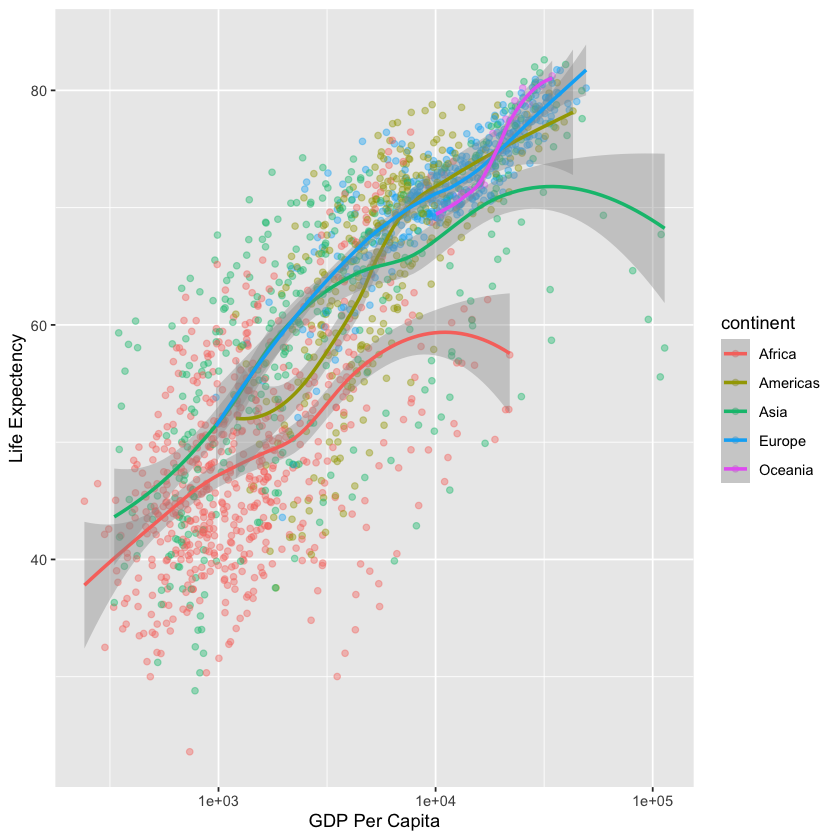

In [11]:
continent_smooth <- ggplot(data = life_data, mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point(alpha = 0.4) +
  geom_smooth() +
  scale_x_log10() +
  labs(x = 'GDP Per Capita', 
       y = 'Life Expectency')
continent_smooth


---
# 3. Multipanel figures (3 points)

In question 1, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

First, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.

In [ ]:
# INSERT CODE HERE



Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

In [ ]:
# INSERT CODE HERE



Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

In [ ]:
# INSERT CODE HERE



That's all for Homework 3! When you are finished, save the notebook as Homework3.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas. 

**DUE:** 5pm EST, Feb 24, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*